<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Борьба-с-дисбалансом-методом-'balanced'" data-toc-modified-id="Борьба-с-дисбалансом-методом-'balanced'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Борьба с дисбалансом методом 'balanced'</a></span></li><li><span><a href="#Борьба-с-дисбалансом-методом-'upsample'" data-toc-modified-id="Борьба-с-дисбалансом-методом-'upsample'-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Борьба с дисбалансом методом 'upsample'</a></span></li><li><span><a href="#Борьба-с-дисбалансом-методом-'downsample'" data-toc-modified-id="Борьба-с-дисбалансом-методом-'downsample'-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Борьба с дисбалансом методом 'downsample'</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Загрузите и подготовьте данные. Поясните порядок действий.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.utils import shuffle


from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


from sklearn.metrics import (mean_absolute_error,accuracy_score,roc_auc_score,f1_score,precision_score, recall_score,
    precision_recall_curve, roc_curve)

In [2]:
df = pd.read_csv('datasets/Churn.csv')

# посмотрю что выходит, возможно нужно загружать с разделителем

df
#все ок

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


**Описание таблицы**

**Признаки:**
* `RowNumber` — индекс строки в данных
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — сколько лет человек является клиентом банка
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата

**Целевой признак:**
* `Exited` — факт ухода клиента

In [3]:
print('Информация по таблице:', '\n')
df.info()
print()
print('Количество пропусков:', '\n')
print(df.isna().sum(), '\n', '\n')
print('Процент пропусков:', '\n')
print(df.isna().mean()*100, '\n')

display(df.describe())
print()
print('Число явных дубликатов:', df.duplicated().sum(), '\n')

Информация по таблице: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB

Количество пропусков: 

RowNumber            0
CustomerId           

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000



Число явных дубликатов: 0 



In [4]:
# Глянем, что за пользователи с пропусками в Tenure

display(df[df['Tenure'].isna()])
display(df[df['Tenure'].isna()].describe())



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,909.000000,9.090000e+02,909.000000,909.000000,0.0,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,4866.386139,1.568981e+07,648.451045,38.647965,NaN,76117.341474,1.530253,0.710671,0.510451,99180.389373,0.201320
std,2909.604343,7.511225e+04,99.079381,9.785438,NaN,63105.690715,0.588452,0.453701,0.500166,56378.063765,0.401207
min,31.000000,1.556581e+07,359.000000,18.000000,NaN,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,2311.000000,1.562658e+07,580.000000,32.000000,NaN,0.000000,1.000000,0.000000,0.000000,49872.330000,0.000000
50%,4887.000000,1.568687e+07,647.000000,37.000000,NaN,96674.550000,1.000000,1.000000,1.000000,99444.020000,0.000000
75%,7306.000000,1.575680e+07,718.000000,43.000000,NaN,128554.980000,2.000000,1.000000,1.000000,145759.700000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,NaN,206663.750000,4.000000,1.000000,1.000000,199390.450000,1.000000


In [5]:
df.sort_values(by = 'CustomerId')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1287,1288,15565701,Ferri,698,Spain,Female,39,9.0,161993.89,1,0,0,90212.38,0
4198,4199,15565706,Akobundu,612,Spain,Male,35,1.0,0.00,1,1,1,83256.26,1
7090,7091,15565714,Cattaneo,601,France,Male,47,1.0,64430.06,2,0,1,96517.97,0
2020,2021,15565779,Kent,627,Germany,Female,30,6.0,57809.32,1,1,0,188258.49,0
3697,3698,15565796,Docherty,745,Germany,Male,48,10.0,96048.55,1,1,0,74510.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,3412,15815628,Moysey,711,France,Female,37,8.0,113899.92,1,0,0,80215.20,0
8271,8272,15815645,Akhtar,481,France,Male,37,8.0,152303.66,2,1,1,175082.20,0
8088,8089,15815656,Hopkins,541,Germany,Female,39,9.0,100116.67,1,1,1,199808.10,1
1762,1763,15815660,Mazzi,758,France,Female,34,1.0,154139.45,1,1,1,60728.89,0


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

**Мыслишки:**

Странно видеть пропуски в годах пользователей, хотя все пользуются хотя бы одним продуктом (`NumOfProducts`). Возможно они только начали пользоваться и не прошло года (хотя в базе есть пользователи с 0 `Tenure`)
Данные пользователи составляют 9.09% пропусков от базы, что достаточно существенно. Общей закономерности в пропусках пользователей не замечаю, у них разный возраст, разные страны, все разное :)
По хорошему стоит уточнить у источника данных, но так как это ресурс могут быть проблемы.

По этой причине считаю целесобразным простовить 0 значения. 

Второй вариант более сложный - простановка даты в зависимости от `CustomerId` так как он выдается по порядку, но тоже работает не правильно, если попсмотреть сортировку по `CustomerId` (у 15565701 - 9 лет, 15565706 - 1 год, 15565796 - 10 лет) Скорее всего номер присваивается при обновлении данных по банкам.

In [8]:
# начнем обработку таблицы
# удалю не влияющие на предсказания данные (хотя имя можно оставить, вдруг гороскоп что подскажет :) )
df.drop(columns=['CustomerId','Surname', 'RowNumber'],axis=1,inplace=True)

# заменим пропуски на нулевые значения 
df['Tenure'] = df['Tenure'].fillna(0)
df['Tenure'] = df['Tenure'].astype('int')
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Исследование задачи

Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.

In [9]:
# Применю one hot encoding к датафрейму, избежав "ловушку фиктивных признаков"

df_ohe=pd.get_dummies(df, drop_first=True)
display(df_ohe.head())

#Вычленяю в список числовые столбцы
numeric = ['CreditScore','Age','Tenure', 'Balance','NumOfProducts','EstimatedSalary']

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


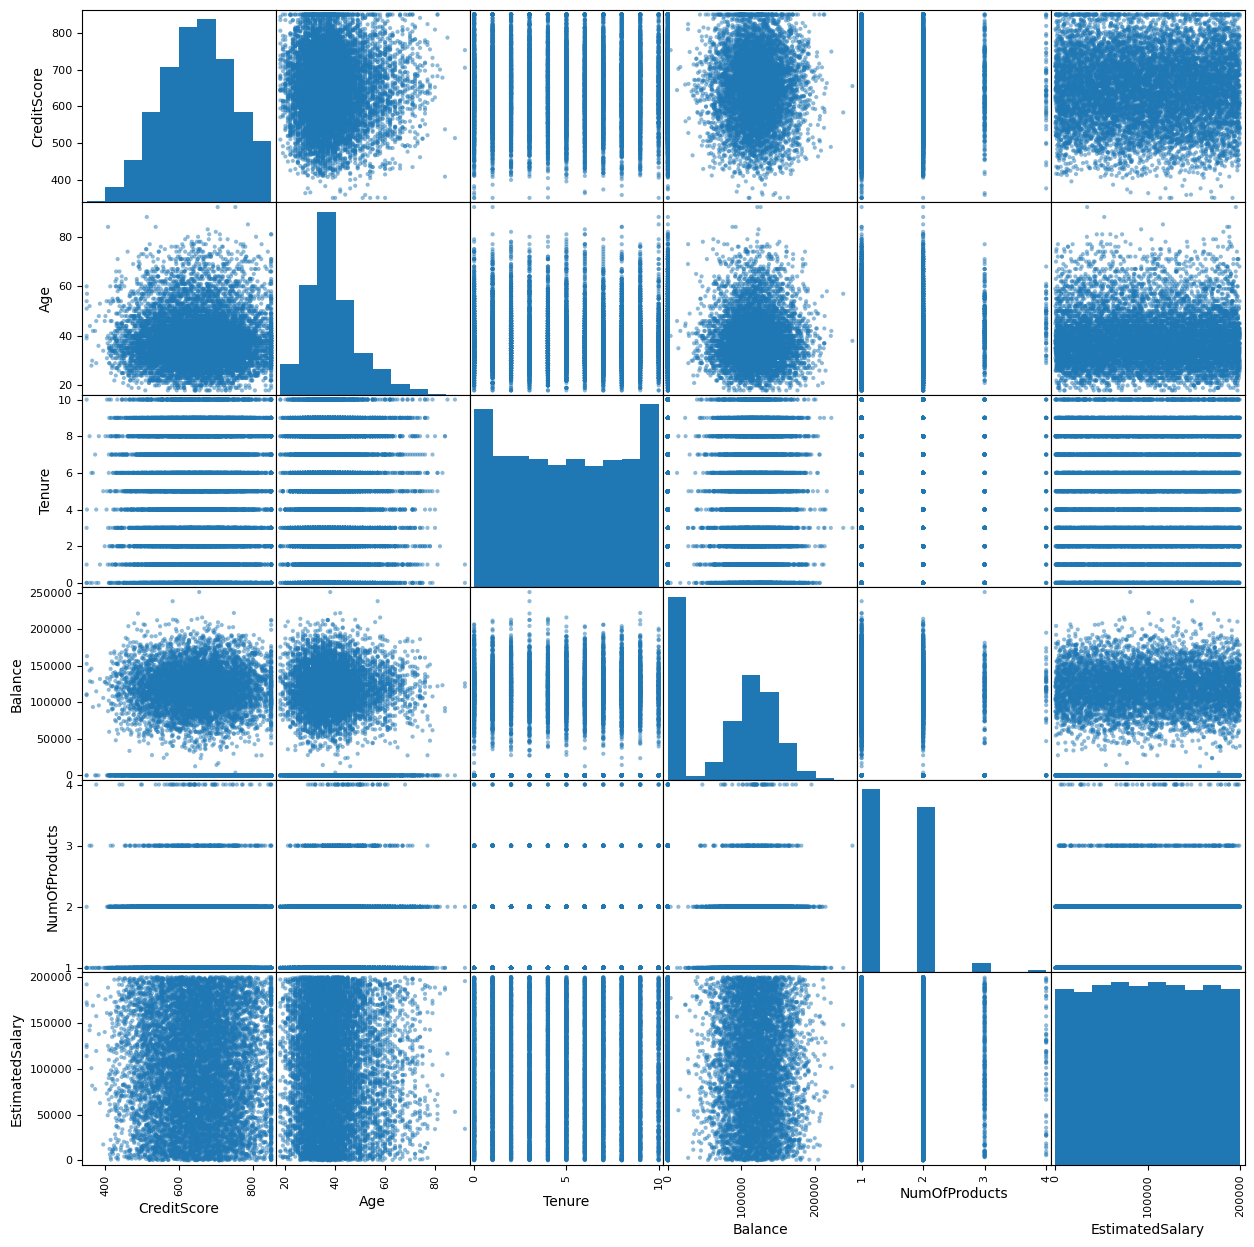

In [10]:
#Проверю на наличие ложной корреляции
pd.plotting.scatter_matrix(df_ohe.loc[:,numeric],figsize=(15,15))
plt.show()

In [11]:
# извлеку признаки и целевой признак
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

#Разбиваю исходные данные в соотношении 3:1:1. 
#Вначале на обучающую 60% и валид+тестовая 40%
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target,  test_size=0.40, random_state=12345)

# валид+тестовая делю пополам 
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid,  test_size=0.50, random_state=12345)



print('Обучающая база:')
print('Колличество - признак:', features_train.shape)
print('Колличество - целевой признак:', target_train.shape, '\n')

print('Валидационная база:')
print('Колличество - признак:', features_valid.shape)
print('Колличество - целевой признак:', target_valid.shape, '\n')

print('Тестовая база:')
print('Колличество - признак:', features_test.shape)
print('Колличество - целевой признак:', target_test.shape, '\n')


Обучающая база:
Колличество - признак: (6000, 11)
Колличество - целевой признак: (6000,) 

Валидационная база:
Колличество - признак: (2000, 11)
Колличество - целевой признак: (2000,) 

Тестовая база:
Колличество - признак: (2000, 11)
Колличество - целевой признак: (2000,) 



In [12]:


#Привожу численные признаки к одному масштабу.
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
print(features_valid.shape)

#Проверяю баланс
features[target == 0].shape, features[target == 1].shape


(6000, 11)
(2000, 11)


((7963, 11), (2037, 11))

Можно обратить внимание, что идет перевес почти в 4 раза, посмотрим какие результаты получатся на несбланасированной модели.

In [13]:
#логистическая регрессия
model_base_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_base_lr.fit(features_train, target_train)
prediction = model_base_lr.predict(features_valid)
print("F1:", f1_score(target_valid, prediction))
print("ROC_auc:", roc_auc_score(target_valid, prediction))



F1: 0.33389544688026984
ROC_auc: 0.5944008250715284


In [14]:
#Посмотрю как влияет изменение порога
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1.0, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))

Порог = 0.00 | Точность = 0.209, Полнота = 1.000
Порог = 0.02 | Точность = 0.211, Полнота = 1.000
Порог = 0.04 | Точность = 0.227, Полнота = 0.990
Порог = 0.06 | Точность = 0.245, Полнота = 0.967
Порог = 0.08 | Точность = 0.258, Полнота = 0.926
Порог = 0.10 | Точность = 0.276, Полнота = 0.897
Порог = 0.12 | Точность = 0.299, Полнота = 0.864
Порог = 0.14 | Точность = 0.321, Полнота = 0.813
Порог = 0.16 | Точность = 0.337, Полнота = 0.773
Порог = 0.18 | Точность = 0.356, Полнота = 0.730
Порог = 0.20 | Точность = 0.371, Полнота = 0.675
Порог = 0.22 | Точность = 0.389, Полнота = 0.639
Порог = 0.24 | Точность = 0.412, Полнота = 0.615
Порог = 0.26 | Точность = 0.434, Полнота = 0.589
Порог = 0.28 | Точность = 0.436, Полнота = 0.550
Порог = 0.30 | Точность = 0.458, Полнота = 0.522
Порог = 0.32 | Точность = 0.464, Полнота = 0.469
Порог = 0.34 | Точность = 0.483, Полнота = 0.440
Порог = 0.36 | Точность = 0.491, Полнота = 0.407
Порог = 0.38 | Точность = 0.493, Полнота = 0.361
Порог = 0.40 | Точно

C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#решающее дерево
f1_best = 0
depth_best = 0
for depth in range(7, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)
    if f1 > f1_best:
            f1_best=f1
            depth_best=depth

print('depth', depth_best,':', 'F1-score', f1_best, '\n')


model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth_best)
model_dtc.fit(features_train, target_train)
prediction = model_dtc.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction))
print('F1', f1_score(target_valid, prediction))

probabilities_valid = model_dtc.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))


depth 9 : F1-score 0.5786516853932585 

Accuracy 0.85
Precision 0.7006802721088435
Recall 0.49282296650717705
F1 0.5786516853932585
AUC-ROC 0.7899719632952051


In [16]:
#cлучайный лес

f1_best = 0
estim_best = 0
depth_best = 0

for estim in range (60, 63):
    for depth in range(10, 12):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        prediction = model.predict(features_valid)
        f1 = f1_score(target_valid, prediction)
        if f1>f1_best:
            f1_best=f1
            estim_best=estim
            depth_best=depth
        

print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best, '\n')

model_rfc = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=12345)
model_rfc.fit(features_train, target_train)
prediction = model_rfc.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction))
print('F1', f1_score(target_valid, prediction))

probabilities_valid = model_rfc.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))


n_estimators = 60 Max depth 10 F1-score 0.5806451612903226 

Accuracy 0.8635
Precision 0.8111587982832618
Recall 0.45215311004784686
F1 0.5806451612903226
AUC-ROC 0.8528420810675121


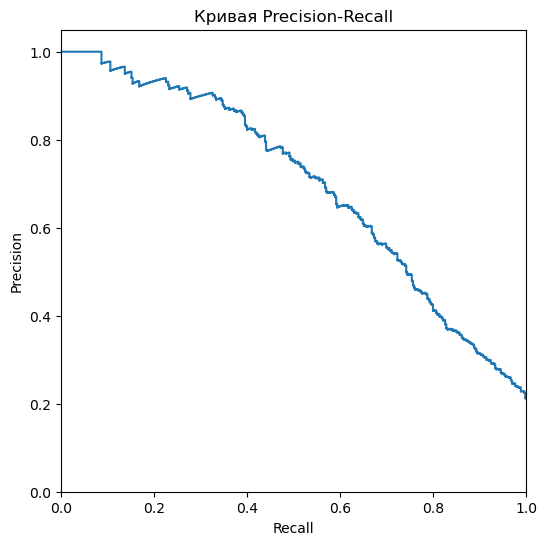

In [17]:
probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Модель явно не стабильна, видны как резкие скачки, так и явные провалы, посмотрим на ROC-кривую

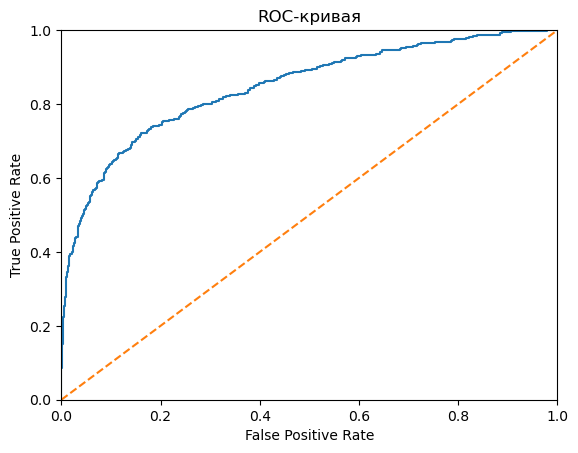

Значение AUC-ROC: 0.8468460975447467


In [18]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)  # < напишите код здесь >

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение AUC-ROC:', auc_roc)

**Промежуточный вывод**

Модель несбалансирована и требует дороботки, была обучена модель на несбалансированной модели - `model_base_lr`
* F1 = 0.33
* ROC_auc = 0.59

Наилучшая точность достигается при "Порог = 0.68 | Точность = 0.711 | Полнота = 0.065"

У всех моделей Recall < precision

ГНаиболее близкая модель к требуемой - `cлучайный лес`

## Борьба с дисбалансом

Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.

### Борьба с дисбалансом методом 'balanced'

In [19]:
#решающее дерево

f1_best = 0
depth_best = 0
for depth in range(2, 18): 
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,': F1-score', f1_best, '\n')

# Расчет метрик
model_dtc_b = DecisionTreeClassifier(random_state=12345, max_depth=depth_best, class_weight='balanced')
model_dtc_b.fit(features_train, target_train)
prediction = model_dtc_b.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction), '\n')
print('F1', f1_score(target_valid, prediction), '\n')
probabilities_valid = model_dtc_b.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))
fpr_dtc, tpr_dtc, thresholds = roc_curve(target_valid, probabilities_valid)


Max depth 5 : F1-score 0.5963791267305644 

Accuracy 0.8105
Precision 0.5374280230326296
Recall 0.6698564593301436 

F1 0.5963791267305644 

AUC-ROC 0.8310244134068074


In [20]:
#случайный лес
f1_best_rfc = 0
estim_best_rfc = 0
depth_best_rfc = 0

for estim in range (80, 100):
    for depth in range(2, 8):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345, class_weight='balanced')
        model.fit(features_train, target_train)
        prediction = model.predict(features_valid)
        f1 = f1_score(target_valid, prediction)
        if f1>f1_best_rfc:
            f1_best_rfc=f1
            estim_best_rfc=estim
            depth_best_rfc=depth
        

print('n_estimators =', estim_best_rfc, ': Max depth', depth_best_rfc, ': F1-score', f1_best_rfc, '\n')

model_rfc_b = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=12345, class_weight='balanced')
model_rfc_b.fit(features_train, target_train)
prediction = model_rfc_b.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction), '\n')
print('F1', f1_score(target_valid, prediction), '\n')

probabilities_valid = model_rfc_b.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))
fpr_rfc, tpr_rfc, thresholds = roc_curve(target_valid, probabilities_valid)

n_estimators = 91 : Max depth 7 : F1-score 0.6227795193312434 

Accuracy 0.8015
Precision 0.5175879396984925
Recall 0.7392344497607656 

F1 0.6088669950738916 

AUC-ROC 0.8478411434862296


In [21]:
#логистическая регрессия
model_lr_b =  LogisticRegression(class_weight='balanced')
model_lr_b.fit(features_train, target_train)
prediction = model_lr_b.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction), '\n')
print('F1', f1_score(target_valid, prediction), '\n')
probabilities_valid = model_lr_b.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))
fpr_lr, tpr_lr, thresholds = roc_curve(target_valid, probabilities_valid)

Accuracy 0.701
Precision 0.3803191489361702
Recall 0.6842105263157895 

F1 0.4888888888888888 

AUC-ROC 0.7634951215528767


Наилучший вариант получается у модели обучения - `случайный лес`, F1 = 0.62

### Борьба с дисбалансом методом 'upsample'

In [22]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 5)


print('Случайный лес:')
model_rfc_u = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=12345)
model_rfc_u.fit(features_upsampled, target_upsampled)
prediction = model_rfc_u.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction), '\n')
print('F1', f1_score(target_valid, prediction), '\n')

probabilities_valid = model_rfc_u.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))

Случайный лес:
Accuracy 0.7355
Precision 0.42893725992317544
Recall 0.8014354066985646 

F1 0.5587989991659716 

AUC-ROC 0.8464332593349827


### Борьба с дисбалансом методом 'downsample'

In [23]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)


print('Случайный лес:')
model_rfc_d = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=12345)
model_rfc_d.fit(features_downsampled, target_downsampled)
prediction = model_rfc_d.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction), '\n')
print('F1', f1_score(target_valid, prediction), '\n')

probabilities_valid = model_rfc_d.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))

Случайный лес:
Accuracy 0.518
Precision 0.2925531914893617
Recall 0.9210526315789473 

F1 0.44405997693194926 

AUC-ROC 0.8274684095596996


Можно заметить что значение F1 опустилось ниже 0.59, оба варианта не подходят для обучения.

<Figure size 640x480 with 0 Axes>

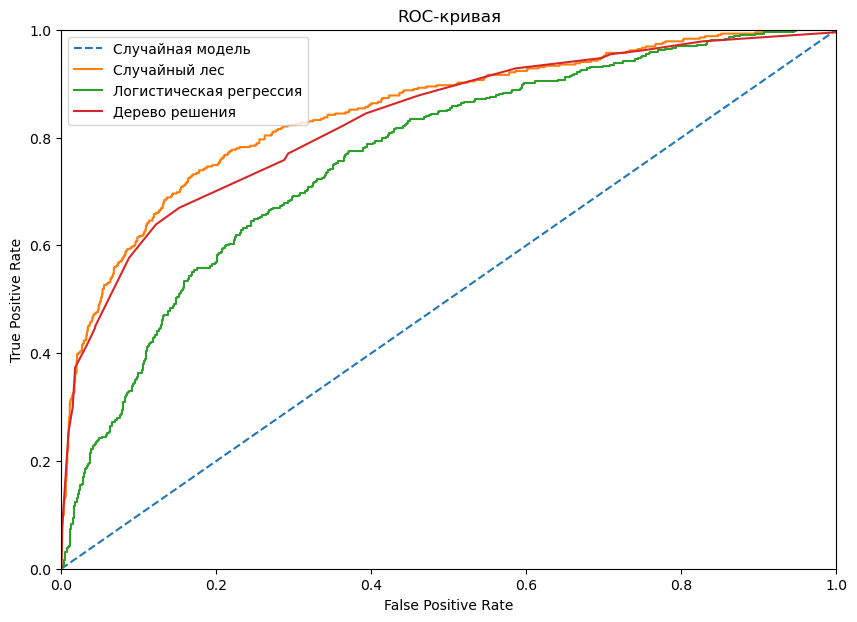

In [24]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_rfc,tpr_rfc)
plt.plot(fpr_lr,tpr_lr)
plt.plot(fpr_dtc,tpr_dtc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left') 
plt.show()


Наиболее подходащяя модель - случайный лес с методом 'balanced'

## Тестирование модели

Проведите финальное тестирование.

In [25]:
model_final = RandomForestClassifier(
    n_estimators=estim_best_rfc, max_depth=depth_best_rfc, random_state=12345, class_weight='balanced')
model_final.fit(features_train, target_train)
prediction = model_final.predict(features_valid)

print('F1', f1_score(target_valid, prediction))
probabilities_valid = model_final.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))

F1 0.6227795193312434
AUC-ROC 0.8561689823916186


In [26]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)
dummy_clf.fit(features_train, target_train)
dummy_clf.score(features_train, target_train)
probabilities_dummy = dummy_clf.predict_proba(features_valid)[:, 1]
print("AUC-ROC =", roc_auc_score(target_valid, probabilities_dummy))


AUC-ROC = 0.5


In [27]:
model_final
prediction = model_final.predict(features_test)
print('F1', f1_score(target_test, prediction))

probabilities_valid = model_final.predict_proba(features_test)[:, 1]
print("AUC-ROC", roc_auc_score(target_test, probabilities_valid))
fpr_f, tpr_f, thresholds = roc_curve(target_test, probabilities_valid)

F1 0.6101344364012409
AUC-ROC 0.8551428558579223


<Figure size 640x480 with 0 Axes>

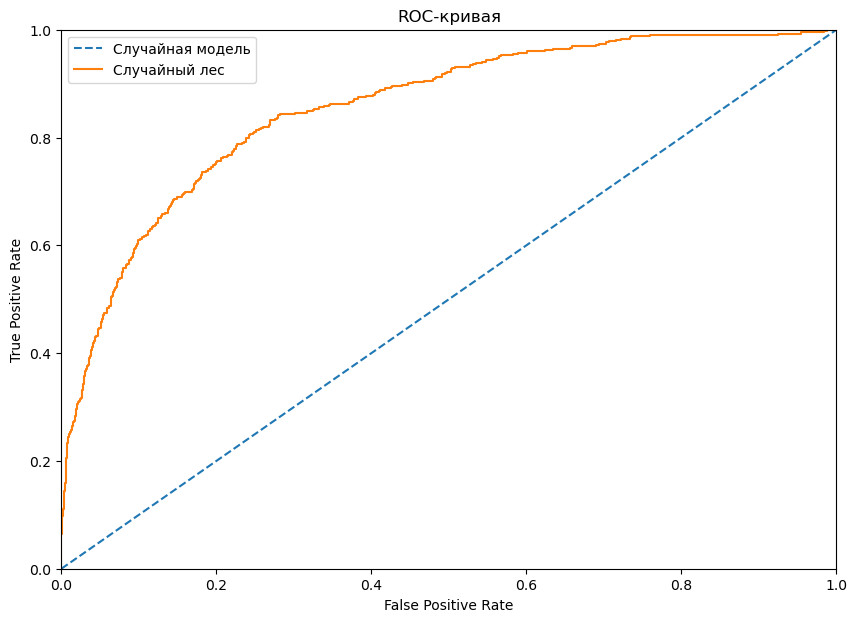

Значение AUC-ROC: 0.8551428558579223


In [28]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_f,tpr_f)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес'),
           loc= 'upper left') 
plt.show()

auc_roc = roc_auc_score(target_test, probabilities_valid)
print('Значение AUC-ROC:', auc_roc)

**Вывод**

В результате обучения модели можно сделать вывод что наиболее удачная модель с для борьбы с дисбалансом методом 'balanced', с использованием "случайного леса"